#A look at the 2023 American League West

With a little more than one month remaining in the 2023 regular season, the American League West division has emerged as the most competitive divisional race in baseball. As of August 28th, the Seattle Mariners, Texas Rangers, and Houston Astros all stand at least 16 games over .500 and within one game of first place.



In [58]:
import pybaseball as pb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

__Current standings:__

In [60]:
print(pb.standings()[2])

                   Tm   W   L  W-L%    GB  E#
1    Seattle Mariners  75  56  .573    --  --
2       Texas Rangers  74  57  .565   1.0  31
3      Houston Astros  75  58  .564   1.0  30
4  Los Angeles Angels  63  69  .477  12.5  19
5   Oakland Athletics  38  94  .288  37.5   ☠


In this article I will dive into some of the division's key statistics, trends, and storylines, with supporting visualizations and data where I find it helpful.

***
##The divisional race


In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
year = 2023
sea = pyball.schedule_and_record(year, 'SEA')
tex = pyball.schedule_and_record(year, 'TEX')
hou = pyball.schedule_and_record(year, 'HOU')
laa = pyball.schedule_and_record(year, 'LAA')
oak = pyball.schedule_and_record(year, 'OAK')

http://www.baseball-reference.com/teams/SEA/2023-schedule-scores.shtml
http://www.baseball-reference.com/teams/TEX/2023-schedule-scores.shtml
http://www.baseball-reference.com/teams/HOU/2023-schedule-scores.shtml
http://www.baseball-reference.com/teams/LAA/2023-schedule-scores.shtml
http://www.baseball-reference.com/teams/OAK/2023-schedule-scores.shtml


In [69]:
def daily_stats(team):
    team['Wins'] = np.where(team['W/L']=='W', 1, (np.where(team['W/L']=='W-wo', 1, 0))).cumsum()
    team['Losses'] = np.where(team['W/L']=='L', 1, (np.where(team['W/L']=='L-wo', 1, 0))).cumsum()
    team['Win_Percentage'] = team['Wins'] / (team['Wins'] + team['Losses'])
    
    return team.truncate(before=0, after=team['Wins'][len(team)-1]+team['Losses'][len(team)-1], axis='index')

sea = daily_stats(sea)
tex = daily_stats(tex)
hou = daily_stats(hou)
laa = daily_stats(laa)
oak = daily_stats(oak)

Text(0.5, 1.0, 'AL West Divisional Race (2023)')

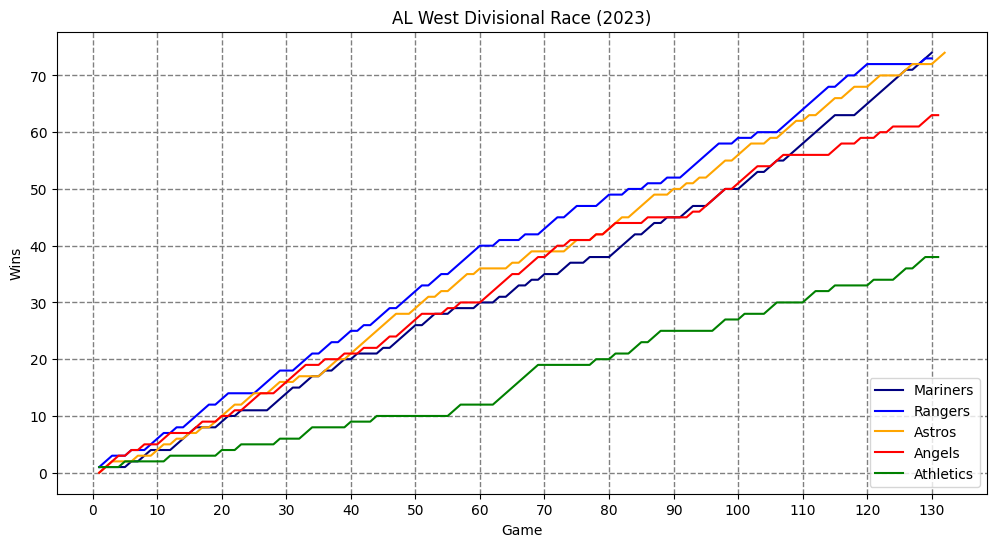

In [74]:
plt.rcParams["figure.figsize"] = (12,6)
plt.grid(color='gray', linestyle='--', linewidth=1)

plt.plot(sea['Wins'], label='Mariners', c='navy')
plt.plot(tex['Wins'], label='Rangers', c='blue')
plt.plot(hou['Wins'], label='Astros', c='orange')
plt.plot(laa['Wins'], label='Angels', c='red')
plt.plot(oak['Wins'], label='Athletics', c='green')

plt.xticks(np.arange(0, 140, step=10))
plt.xlabel('Game')
plt.ylabel('Wins')

plt.legend(loc='lower right')

plt.title("AL West Divisional Race ({})".format(year))

A few things to note here about each team:

__Texas Rangers__
An extremely strong start to the season gave Texas a clear division lead at the 60 game mark, which they maintained until August 27th. This isn't necessarily due to poor play, however - their current winning percentage of .568 is sixth-best in the majors and third-best in the AL. Unfortunately for Texas, they are stuck in a division with two of the other strongest teams in the game.

__Houston Astros__
The 2023 Astros may not be as dominant as they were in recent years (four 100-win seasons since 2017), but they are clearly still a legitimate contender. Solidly in second place for most of the year, Houston has won 58% of their games since the beginning of July and find themselves with a clear chance to take the division title.

__Seattle Mariners__